# Data shift

In [7]:
subject=5
ppg_name="rppg" # rppg
sr=30 # 255 or 30
start=30 # 30000 (c->msec) or 30(r->sec)
length=18000 # 153000, 18000

path="D:\\prlab\\ysg\\rppg\\new\\data\\%s\\%s%d.csv"%(ppg_name,ppg_name,subject)
ppg = pd.read_csv(path,header=None)
ppg=ppg.transpose()
ppg.columns=['hr','time','group']
print(ppg)
print("before : ", len(ppg))

group=pd.to_numeric(ppg['group'])
group=group[group>=start].index[0]
cut_ppg=ppg[group:group+length]

#cut_ppg=ppg[(sr * 30) : sr * 630]

print(cut_ppg)
print("after: ",len(cut_ppg)) # 10분

t1=0
t2=sr*300
#print(t1,t2) # 5분 -> 300초 ->데이터 9000개
for i in range(len(cut_ppg)):
    new_ppg=cut_ppg[t1:t2].transpose()
    new_ppg.to_csv("D:\\prlab\\ysg\\rppg\\new\\data\\%s\\shift\\%d\\%s%d_%d.csv" %(ppg_name,subject,ppg_name,subject,i),header=False,index=False)
    t1=t1+(30*sr)
    t2=t2+(30*sr)
    print(t1,t2)
    if t2>len(cut_ppg):
        break
    print('data shifting : ',str(subject)+'_'+str(i))

             hr         time  group
0     -0.000219       0.0000    0.0
1     -0.001782      33.3333    0.0
2     -0.003681      66.6667    0.0
3     -0.006009     100.0000    0.0
4     -0.008492     133.3333    0.0
...         ...          ...    ...
19757 -0.000055  659866.6667  659.0
19758 -0.000218  659900.0000  659.0
19759 -0.000215  659933.3333  659.0
19760 -0.000057  659966.6667  659.0
19761  0.000196  660000.0000  660.0

[19762 rows x 3 columns]
before :  19762
             hr         time  group
861    0.001519   30000.0000   30.0
862    0.001212   30033.3333   30.0
863    0.000681   30066.6667   30.0
864   -0.000025   30100.0000   30.0
865   -0.000776   30133.3333   30.0
...         ...          ...    ...
18856 -0.000499  629833.3333  629.0
18857 -0.000900  629866.6667  629.0
18858 -0.001497  629900.0000  629.0
18859 -0.002182  629933.3333  629.0
18860 -0.002760  629966.6667  629.0

[18000 rows x 3 columns]
after:  18000
900 9900
data shifting :  5_0
1800 10800
data shifting

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
[ 1.          1.47368421  1.94736842  2.42105263  2.89473684  3.36842105
  3.84210526  4.31578947  4.78947368  5.26315789  5.73684211  6.21052632
  6.68421053  7.15789474  7.63157895  8.10526316  8.57894737  9.05263158
  9.52631579 10.        ]
[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


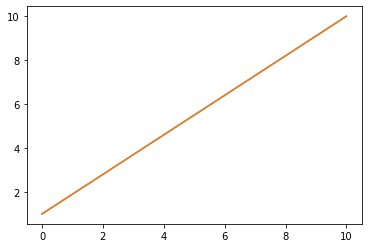

In [49]:
# test
from scipy.interpolate import interp1d
x=np.linspace(0,10,10)
y=[1,2,3,4,5,6,7,8,9,10]

i=interp1d(x,y,kind = 'quadratic')
new_x=np.linspace(0,10,20)

print(y)
print(x)

print(i(new_x))
print(new_x)

plt.plot(x,y)
plt.plot(new_x,i(new_x))
# x= interp1d(r_peaks_x[1:],rppg_ppi,kind = 'quadratic')
# new_x=np.linspace(r_peaks_x[1], r_peaks_x[-1], len(r_peaks_x)*2)

# hrv graph 시각화

In [2]:
import os
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import signal
import csv
import math
from hrvanalysis import get_frequency_domain_features
from utils import *
import pandas as pd
import sys

## csv파일 불러오기


In [160]:
# 그래프 확인하기
subject=4
num=5

cppg_frequency_features=[]
rppg_frequency_features=[]

path_rppg="D:\\prlab\\ysg\\rppg\\new\\data\\rppg\\shift\\%d\\rppg%d_%d.csv"%(subject,subject,num)#"D:\\prlab\\ysg\\rppg\\new\\data\\rppg\\rppg%d.csv"%(subject)
rppg = pd.read_csv(path_rppg,header=None)
rppg=rppg.transpose()
rppg.columns=['hr','time','group']
#rppg=rppg[(30 * 30) : (30 * 630)]

rppg_time=np.array(rppg['time'],dtype='float32')
rppg_hr=np.array(rppg['hr'],dtype='float32')


print(rppg_hr.shape)
print(rppg)

path_cppg="D:\\prlab\\ysg\\rppg\\new\\data\\cppg\\shift\\%d\\cppg%d_%d.csv"%(subject,subject,num)#"D:\\prlab\\ysg\\rppg\\new\\data\\cppg\\cppg%d.csv"%(subject)
cppg = pd.read_csv(path_cppg,header=None)
cppg=cppg.transpose()
cppg.columns=['hr','realtime','time']
#cppg=cppg[(255 * 30): (255 * 630)]

cppg_time=np.array(cppg['time'],dtype='float32')
cppg_hr=np.array(cppg['hr'],dtype='float32')


c_sr=255
r_sr=30

c_distance=12
r_distance=10

(9000,)
            hr         time  group
0    -0.001796  180000.0000  180.0
1    -0.001010  180033.3333  180.0
2    -0.000160  180066.6667  180.0
3     0.000569  180100.0000  180.0
4     0.001070  180133.3333  180.0
...        ...          ...    ...
8995  0.001322  480100.0000  480.0
8996  0.001370  480133.3333  480.0
8997  0.001271  480166.6667  480.0
8998  0.000993  480200.0000  480.0
8999  0.000546  480233.3333  480.0

[9000 rows x 3 columns]


In [161]:
print(len(cppg_hr),len(rppg_hr)) # shift후 > 5분데이터 (76500,9000)
print(cppg_hr)
print(cppg_time)

76500 9000
[2490. 2476. 2460. ... 2018. 2013. 2007.]
[180126.69 180130.14 180133.27 ... 480283.47 480287.06 480291.  ]


-----------------filtering---------------
-------------------------------------------------
76500
76500


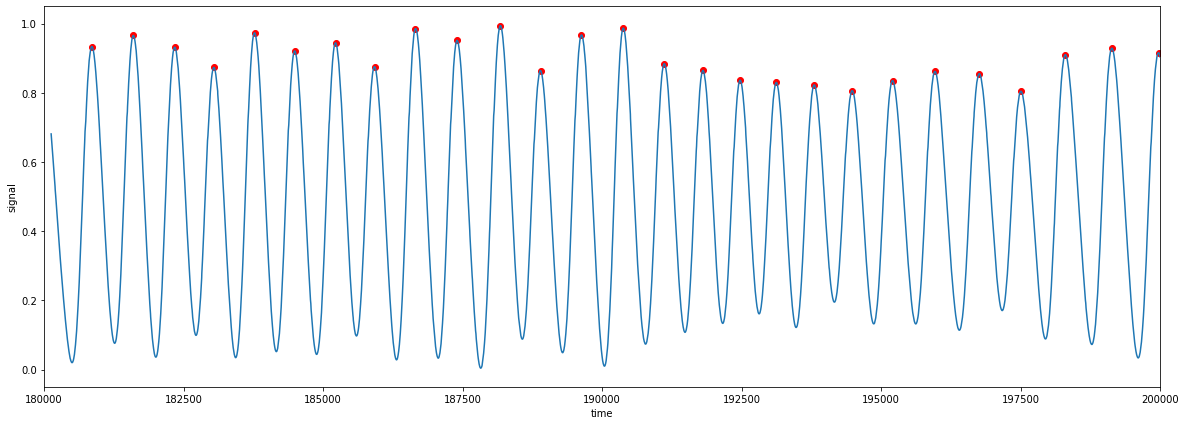

In [162]:
# 앞뒤 30초 cutting
c_distance=150

filter_c=preprocessing(cppg_hr,2.0,0.5,c_sr)
print(len(filter_c))
scale_c=normalization(filter_c)
print(len(scale_c))
c_peaks_y,c_peaks_x=detect_peak(cppg_time,scale_c,c_distance)

plt.figure(figsize=(20, 7))    
plt.scatter(c_peaks_x, c_peaks_y,color='red')
plt.plot(cppg_time, scale_c, label="find feak in time domain")
plt.xlim([180000, 200000])# msec # 30초 즉, 30000msec 씩 shift
plt.xlabel('time')
plt.ylabel('signal')
plt.show()


-----------------filtering---------------
-------------------------------------------------
180251.17889122735


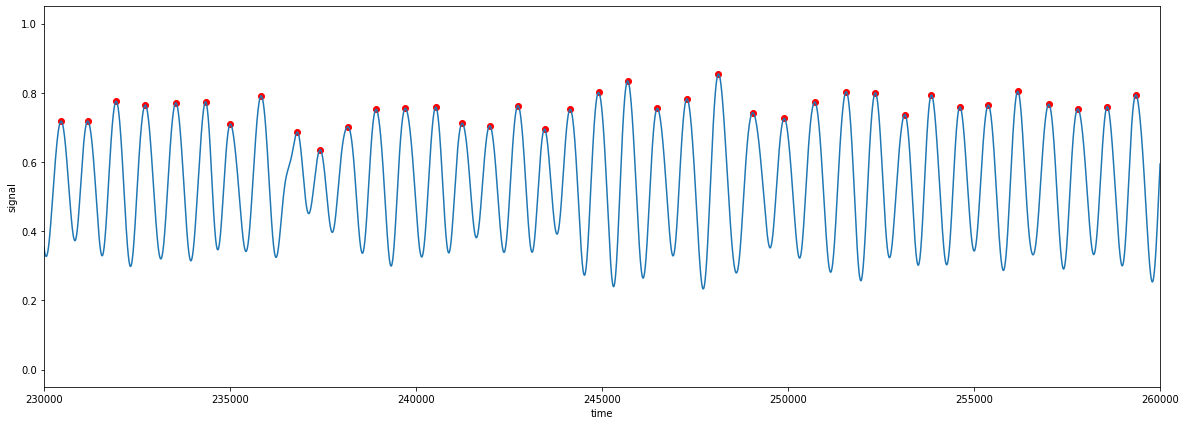

In [164]:
# signal interpolation

x=rppg_time
new_x=np.linspace(rppg_time[0],rppg_time[-1],len(cppg_time))
i=interp1d(x,rppg_hr,kind = 'quadratic')


rppg_hr=i(new_x)
rppg_time=new_x
# 앞,뒤 30초씩 cutting
r_distance=50

# signal interpolation


filter_r=preprocessing(rppg_hr,2.0,0.5,c_sr)

scale_r=normalization(filter_r)

r_peaks_y,r_peaks_x=detect_peak(rppg_time,scale_r,r_distance)
print(r_peaks_x[0])

plt.figure(figsize=(20, 7))    
plt.scatter(r_peaks_x, r_peaks_y,color='red')
plt.plot(rppg_time,scale_r, label="find feak in time domain")
plt.xlim([230000, 260000])# msec
plt.xlabel('time')
plt.ylabel('signal')
plt.show()

-----------------filtering---------------
-------------------------------------------------
180233.328125


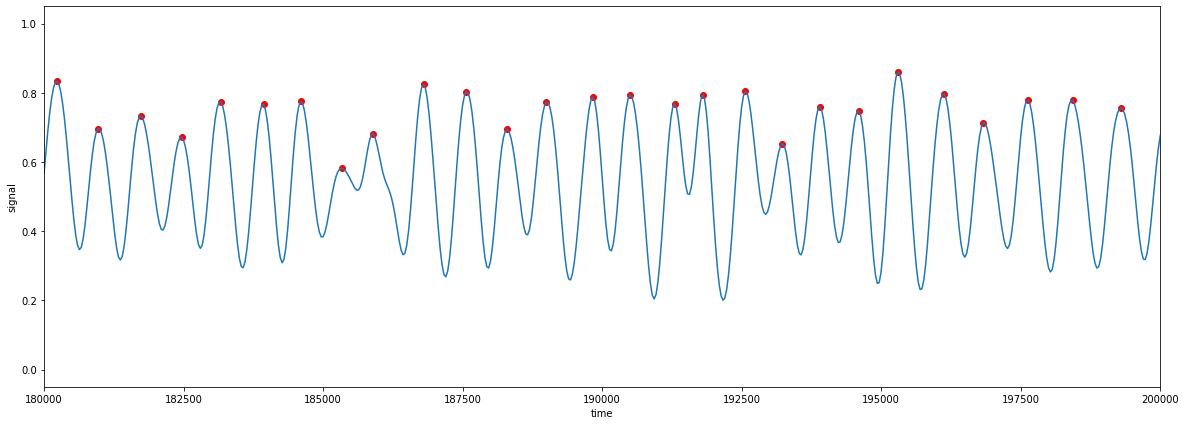

In [163]:
# 앞,뒤 30초씩 cutting
r_distance=15

# signal interpolation


filter_r=preprocessing(rppg_hr,2.0,0.5,r_sr)

scale_r=normalization(filter_r)

r_peaks_y,r_peaks_x=detect_peak(rppg_time,scale_r,r_distance)
print(r_peaks_x[0])

plt.figure(figsize=(20, 7))    
plt.scatter(r_peaks_x, r_peaks_y,color='red')
plt.plot(rppg_time,scale_r, label="find feak in time domain")
plt.xlim([180000, 200000])# msec
plt.xlabel('time')
plt.ylabel('signal')
plt.show()



# ppi

ppi shape:  393 394


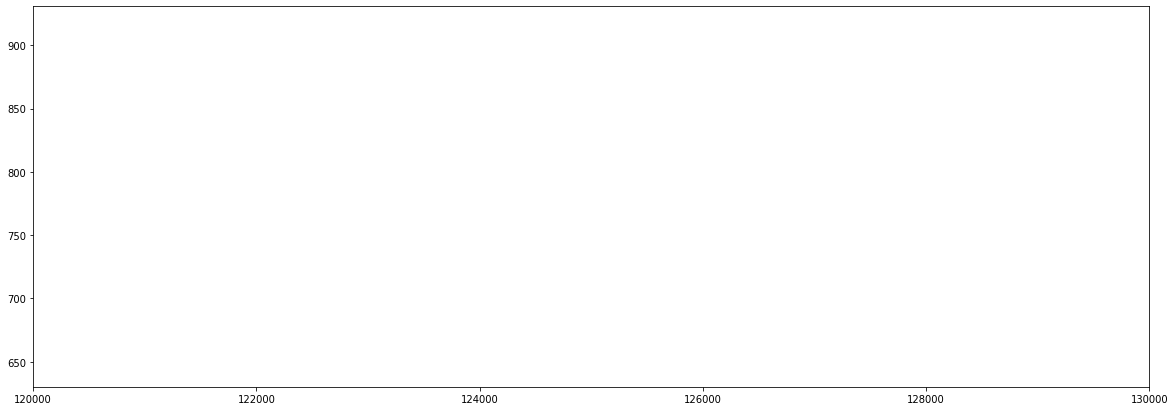

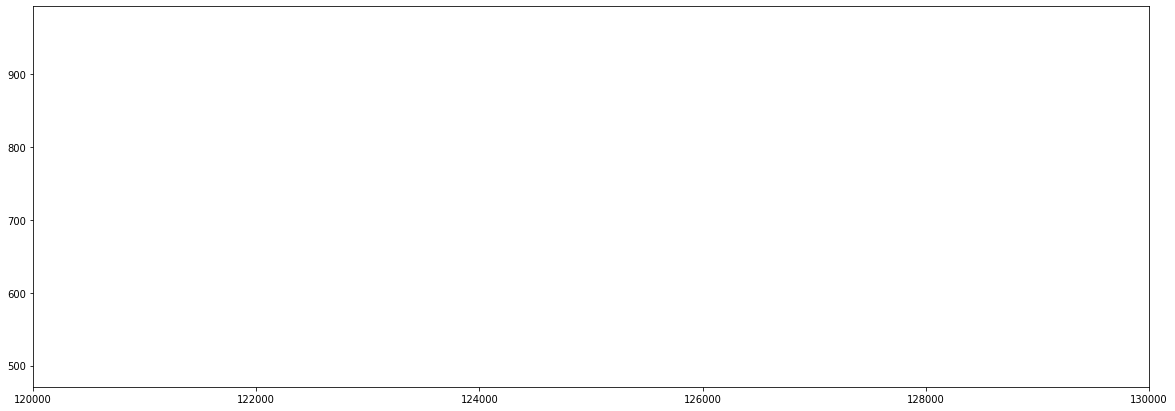

395


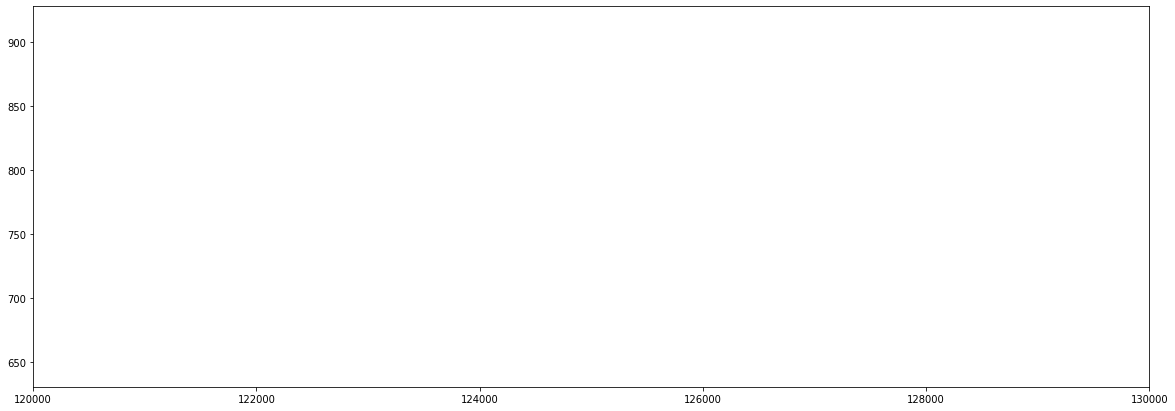

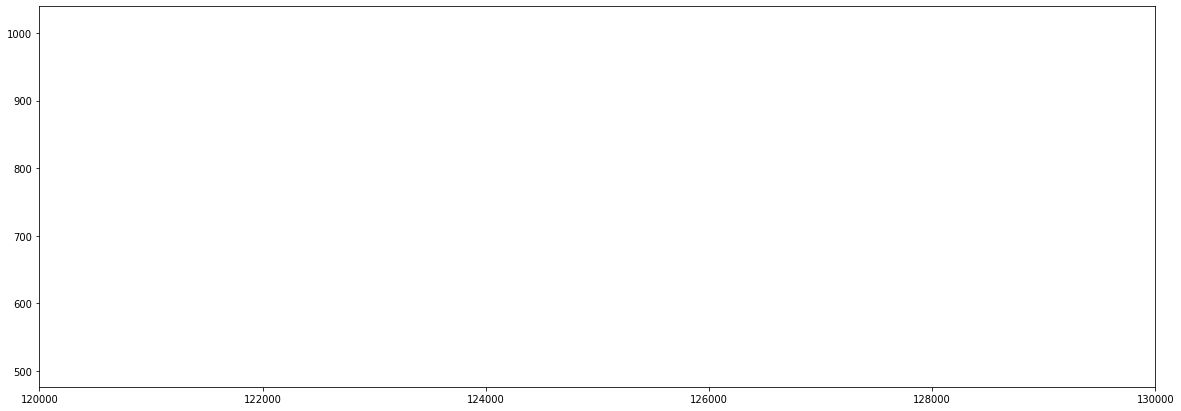

790 394
180251.17889122735


In [165]:
from scipy.stats import zscore
cppg_ppi=np.diff(c_peaks_x)
rppg_ppi=np.diff(r_peaks_x)

print("ppi shape: ",len(cppg_ppi),len(rppg_ppi))

plt.figure(figsize=(20, 7))    
plt.plot(c_peaks_x[1:],cppg_ppi)
plt.xlim(120000,130000)
plt.show()
#print(cppg_ppi)

plt.figure(figsize=(20, 7))    
plt.plot(r_peaks_x[1:],rppg_ppi)
plt.xlim(120000,130000)
plt.show()
#print(rppg_ppi)


# interpoloation
from scipy.interpolate import interp1d
print(len(r_peaks_x))
x= interp1d(r_peaks_x[1:],rppg_ppi,kind = 'quadratic')
new_x=np.linspace(r_peaks_x[1], r_peaks_x[-1], len(r_peaks_x)*2)

x2= interp1d(c_peaks_x[1:],cppg_ppi,kind='quadratic')
new_x2=np.linspace(c_peaks_x[1],c_peaks_x[-1],len(c_peaks_x)*2)



plt.figure(figsize=(20, 7))  
plt.plot(new_x2,x2(new_x2))
plt.xlim(120000,130000)
plt.show()

plt.figure(figsize=(20, 7))  
plt.plot(new_x,x(new_x))
plt.xlim(120000,130000)
plt.show()


print(len(x(new_x)), len(rppg_ppi))
print(r_peaks_x[0])

rppg_ppi=x(new_x)
cppg_ppi=x2(new_x2)

# # outlier 조정
# plt.figure(figsize=(40, 15))
# rr_corrected = rppg_ppi_.copy()
# rr_corrected[np.abs(zscore(rppg_ppi_)) > 2] = np.median(rppg_ppi_)

# rppg_ppi=rr_corrected

# plt.title("RR-intervals", fontsize=24)
# plt.xlabel("Time (ms)", fontsize=16)
# plt.ylabel("RR-interval (ms)", fontsize=16)

# plt.plot(rppg_ppi_, color="red", linewidth=1, label="RR-intervals")
# plt.plot(rr_corrected, color="green", linewidth=2, label="RR-intervals after correction")
# 
# plt.legend(fontsize=20)

In [33]:
print(cppg_ppi)
print(rppg_ppi)

[[711.640625   733.390625   741.9453125  ... 725.4375     714.875
  765.5625    ]
 [724.98292476 737.85782036 749.96553802 ... 725.33025647 714.89930137
  765.5625    ]
 [733.76203785 742.12094979 746.11326941 ... 725.22344458 714.92370344
  765.5625    ]
 ...
 [715.15772218 715.20656826 715.25636028 ... 765.16137461 765.35488232
  765.5625    ]
 [732.70904568 732.77102864 732.83382864 ... 765.36174901 765.45864081
  765.5625    ]
 [765.5625     765.5625     765.5625     ... 765.5625     765.5625
  765.5625    ]]
[ 766.6640625   743.61582491  733.07715925  734.94432905  732.17281273
  712.88673349  712.88673349  712.88673349  704.6814303   722.27250712
  743.06563599  763.37455328  764.07769373  744.05960143  724.63047209
  708.00670108  708.00670108  708.00670108  708.00670108  731.10086869
  743.39958232  733.85924614  711.24993727  700.43170403  721.96850252
  732.53126173  708.51841433  702.40373804  730.848845    724.54309893
  724.54309893  724.54309893  724.54309893  724.5430989

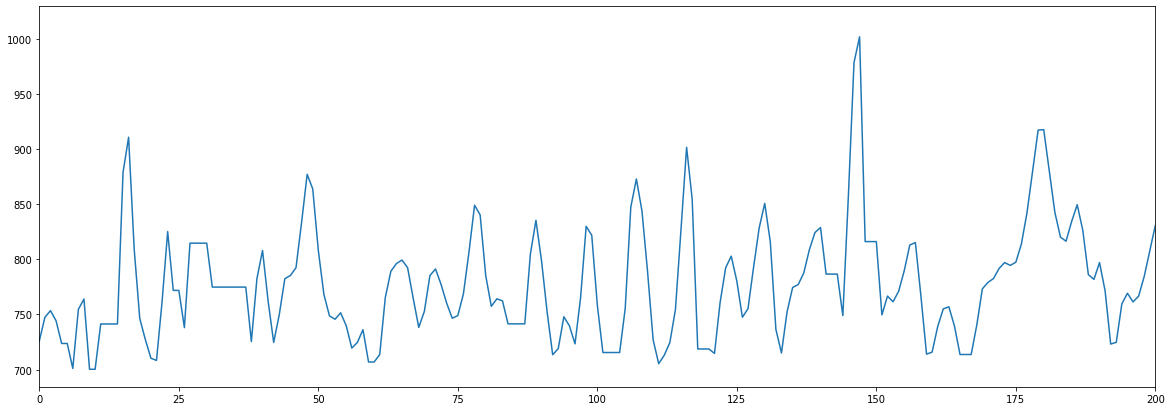

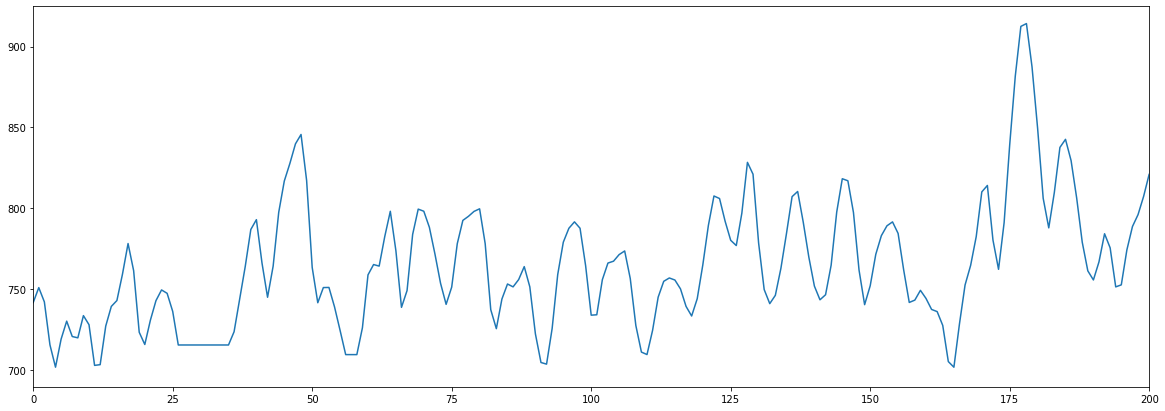

In [166]:
# outlier remove
rppg_ppi_=rppg_ppi
for i in range(len(rppg_ppi)):
    if rppg_ppi[i]>1200 or rppg_ppi[i]<700:
        rppg_ppi_[i]=rppg_ppi[i-1]
    else:
        rppg_ppi_[i]=rppg_ppi[i]
rppg_ppi=rppg_ppi_
plt.figure(figsize=(20, 7))    
plt.plot(rppg_ppi)
plt.xlim(0,200)
plt.show()

cppg_ppi_=cppg_ppi
for i in range(len(cppg_ppi)):
    if cppg_ppi[i]>1200 or cppg_ppi[i]<700:
        cppg_ppi_[i]=cppg_ppi[i-1]
    else:
        cppg_ppi_[i]=cppg_ppi[i]
cppg_ppi=cppg_ppi_
plt.figure(figsize=(20, 7))    
plt.plot(cppg_ppi)
plt.xlim(0,200)
plt.show()

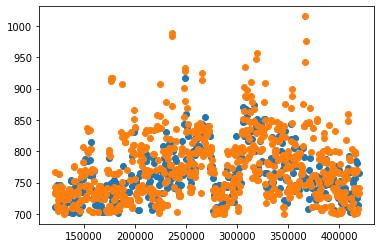

In [25]:
plt.scatter(c_peaks_x[1:],cppg_ppi)
#plt.scatter(r_peaks_x[1:],rppg_ppi)
plt.scatter(new_x,rppg_ppi)
#plt.xlim([330000,360000])
plt.show()

# hrv features

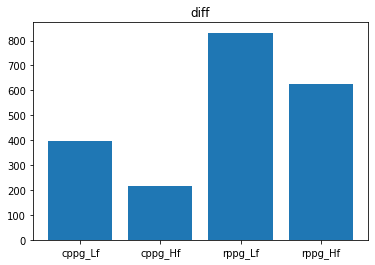

c의 lf는 r보다 (c_lf / r_lf =)  0.4768814895656429 배 크다
c의 hf는 r보다 (c_hf / r_hf =)  0.34330064542397165 배 크다
r의 lf는 c보다 (r_lf / c_lf =)  2.0969570467304743 배 크다
r의 hf는 c보다 (r_hf / c_hf =)  2.912898689033962 배 크다
r의 lf는 c보다 (r_lf - c_lf =) 434.6589303479525 만큼 크다
r의 hf는 c보다 (r_hf - c_hf =) 410.7101183173902 만큼 크다
배율:  0.7198867075689173
r의 hf는 lf와 비교했을때 ((r_hf - c_hf) / (r_lf - c_lf) = ) 0.9449020591584514 배 차이가 크다
c의 hf는 lf와 비교했을때 ((c_hf - r_hf) / (c_lf - r_lf) = ) 0.9449020591584514 배 차이가 크다
lf_hf_ratio:  1.8455063836106205 1.3285555142948688


,LF,HF,diff
cppg,396.240611,214.705630,-181.535
rppg,830.899541,625.415748,-205.484
c-r diff,-434.658930,-410.710118,-


In [167]:
import pandas as pd
from pandas import DataFrame

cppg_frequency_feature = get_frequency_domain_features(cppg_ppi)
rppg_frequency_feature = get_frequency_domain_features(rppg_ppi)


plt.bar(['cppg_Lf','cppg_Hf','rppg_Lf','rppg_Hf'],[cppg_frequency_feature['lf'],cppg_frequency_feature['hf'],rppg_frequency_feature['lf'],rppg_frequency_feature['hf']])
plt.title('diff')
plt.show()

data={'LF':[cppg_frequency_feature['lf'],rppg_frequency_feature['lf'],cppg_frequency_feature['lf']-rppg_frequency_feature['lf']],
        'HF':[cppg_frequency_feature['hf'],rppg_frequency_feature['hf'],cppg_frequency_feature['hf']-rppg_frequency_feature['hf']],
     'diff':[cppg_frequency_feature['hf']-cppg_frequency_feature['lf'],rppg_frequency_feature['hf']-rppg_frequency_feature['lf'],"-"]}
frame=DataFrame(data,index=['cppg','rppg','c-r diff'])

print("================================================================================================")

print("c의 lf는 r보다 (c_lf / r_lf =) ",cppg_frequency_feature['lf']/ rppg_frequency_feature['lf'],"배 크다")
print("c의 hf는 r보다 (c_hf / r_hf =) ",cppg_frequency_feature['hf']/rppg_frequency_feature['hf'],"배 크다")


print("================================================================================================")
print("r의 lf는 c보다 (r_lf / c_lf =) ",rppg_frequency_feature['lf']/ cppg_frequency_feature['lf'],"배 크다")
print("r의 hf는 c보다 (r_hf / c_hf =) ",rppg_frequency_feature['hf']/ cppg_frequency_feature['hf'],"배 크다")
print("r의 lf는 c보다 (r_lf - c_lf =)",rppg_frequency_feature['lf'] - cppg_frequency_feature['lf'],"만큼 크다")
print("r의 hf는 c보다 (r_hf - c_hf =)",rppg_frequency_feature['hf'] - cppg_frequency_feature['hf'],"만큼 크다")
print("배율: ", (rppg_frequency_feature['lf']/ cppg_frequency_feature['lf'])/(rppg_frequency_feature['hf']/ cppg_frequency_feature['hf']) )
print("================================================================================================")
print("r의 hf는 lf와 비교했을때 ((r_hf - c_hf) / (r_lf - c_lf) = )", abs(rppg_frequency_feature['hf']-cppg_frequency_feature['hf'])/abs(rppg_frequency_feature['lf']- cppg_frequency_feature['lf']),"배 차이가 크다")
print("c의 hf는 lf와 비교했을때 ((c_hf - r_hf) / (c_lf - r_lf) = )", abs(cppg_frequency_feature['hf']-rppg_frequency_feature['hf'])/abs(cppg_frequency_feature['lf']- rppg_frequency_feature['lf']),"배 차이가 크다")

print("================================================================================================")
print("lf_hf_ratio: ",cppg_frequency_feature['lf_hf_ratio'],rppg_frequency_feature['lf_hf_ratio'] )
frame

In [348]:
print(cppg_frequency_feature )
print(rppg_frequency_feature)

{'lf': 227.6909177512353, 'hf': 478.1535473610732, 'lf_hf_ratio': 0.4761878668638144, 'lfnu': 32.257944774704285, 'hfnu': 67.74205522529572, 'total_power': 875.085951015152, 'vlf': 169.2414859028434}
{'lf': 330.51553904454164, 'hf': 962.6794659648692, 'lf_hf_ratio': 0.3433287513962649, 'lfnu': 25.558058743208374, 'hfnu': 74.44194125679164, 'total_power': 1463.8919040495068, 'vlf': 170.69689904009593}


# 결과 csv로 저장

In [349]:
cppg_frequency_feature['num'] = "cppg"+str(subject) + "_" + str(num)
rppg_frequency_feature['num'] = "rppg"+str(subject) + "_" + str(num)

In [350]:
save_path="D:\\prlab\\ysg\\rppg\\new\\result\\%d.csv"%subject
with open(save_path, 'a', newline='') as f:
    wr = csv.writer(f)
    if num==0:
        # 처음만 csv에 key 저장
        wr.writerow(cppg_frequency_feature.keys())
    wr.writerow(cppg_frequency_feature.values())
    wr.writerow(rppg_frequency_feature.values())
    f.close()